In [3]:
import json
from os import makedirs, listdir
from os.path import basename, dirname, exists, isfile, join, realpath
import numpy as np
import matplotlib.pyplot as plt
import sys

{'std': 320.2366704422569, '75th': 1244.0, '25th': 1242.75, '50th': 1243.39, 'max': 10057.6, '99th': 1245.74, 'CoV': 0.2544345198621221, 'min': 769.464, '1st': 1197.36, 'npoints': 65903, 'avg': 1258.6211596437188}


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:58: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.


{'std': 115.71860038973881, '75th': 7490.79, '25th': 7480.7775, '50th': 7486.04, 'max': 8302.49, '99th': 8219.785499999998, 'CoV': 0.015462967179602211, 'min': 6664.54, '1st': 6730.0405, 'npoints': 8256, 'avg': 7483.596068313954}
{'std': 45.89267723064035, '75th': 3744.94, '25th': 3739.91, '50th': 3742.53, 'max': 4076.84, '99th': 4036.4461000000015, 'CoV': 0.012264879190395215, 'min': 3413.02, '1st': 3452.2433000000005, 'npoints': 8008, 'avg': 3741.7961088911093}


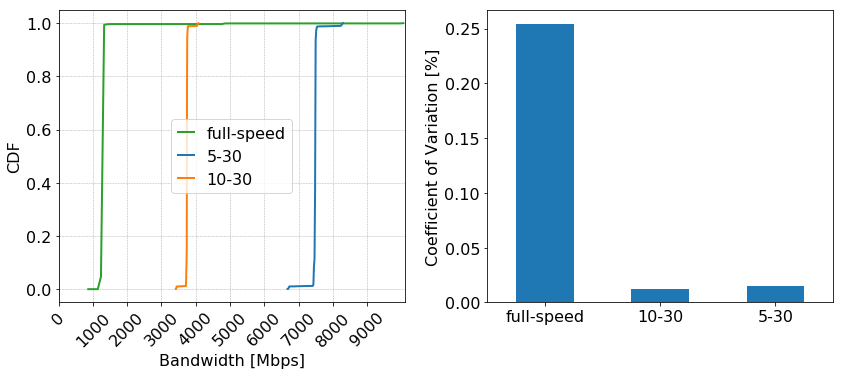

In [4]:

plt.rcParams.update({'font.size': 16})

bw_values = dict()
retransmits = dict()

filedir = realpath("./")
inputdir = realpath(join(filedir, '../data/fig6/'))

def get_statistics(values, message):
	print("===========================")
	result = dict()
	result["avg"] = np.mean(values)
	result["std"] = np.std(values)
	result["npoints"] = len(values)
	result["99th"] = np.percentile(values, 99)
	result["75th"] = np.percentile(values, 75)
	result["50th"] = np.percentile(values, 50)
	result["25th"] = np.percentile(values, 25)
	result["1st"] = np.percentile(values, 1)
	result["CoV"] = result["std"] / result["avg"]
	result["min"] = np.min(values)
	result["max"] = np.max(values)
	print(result)
	print("================================")
	return result

def get_bw_per_machine(machine_file, bw_values, retr):
	crnt_file = open(machine_file)
	data = json.load(crnt_file)

	no_intervals = len(data["intervals"])
	bandwidth = 0
	for i in range(0, no_intervals):
		no_bytes = data["intervals"][i]["sum"]["bits_per_second"]
		bandwidth = no_bytes / (1000 * 1000)
		bw_values.append(bandwidth)
		retr.append(data["intervals"][i]["sum"]["retransmits"])

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5.5))
hindex = 0
dirnames=['full-speed','5-30','10-30']
stats = dict()
colors=['#2ca02c', '#1F77B4', '#ff7f0e']
j=0

for d in dirnames:
	dirname = join(inputdir, d)
	bw_values[d] = []
	retransmits[d] = []
	machine_files = [join(dirname, f) for f in listdir(dirname) if isfile(join(dirname, f)) and f.endswith(".json")]
	partnames = ["cmeans", "cmedians", "cmaxes", "cmins", "cbars"]

	for machine_file in machine_files:
		get_bw_per_machine(machine_file, bw_values[d], retransmits[d])

	stats[d] = get_statistics(bw_values[d], "bandwidth -> " + dirname)
	counts, bin_edges = np.histogram(bw_values[d], bins=100, normed=True)
	cdf = np.cumsum(counts)
	ax[0].plot(bin_edges[1:], cdf/cdf[-1], label=d, color=colors[j], linewidth=2.0)
	ax[0].set_xlim(0, 10500)
	hindex += 1
	j += 1

ax[0].set_xlim(0, 10100)
ax[0].set_xticks(np.arange(0, 10000, 1000))
ax[0].set_ylabel("CDF")
ax[0].set_xlabel("Bandwidth [Mbps]")
ax[0].grid(True, which="both", linestyle="--", linewidth=0.5)
ax[0].legend(loc="center", handlelength=1)
ax[1].bar([1, 2, 3], [stats["full-speed"]["CoV"], stats["10-30"]["CoV"], stats["5-30"]["CoV"]], color='#1F77B4', edgecolor='none', align='center', width=0.5)
ax[1].set_ylabel("Coefficient of Variation [%]")
ax[1].set_xlim(0.5, 3.5)
for tick in ax[0].get_xticklabels():
    tick.set_rotation(45)
plt.xticks([1, 2, 3], ['full-speed', '10-30', '5-30'])
plt.tight_layout()

plt.show()